<a href="https://colab.research.google.com/github/hahaws666/-/blob/main/pltr_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mean of Daily Change (%): 0.44
Variance of Daily Change (%): 7.41


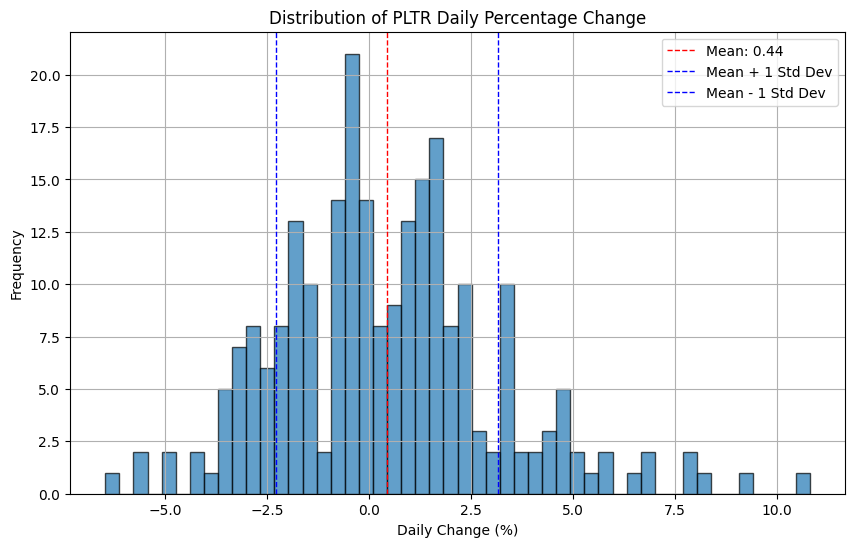

In [7]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def track_and_plot_pltr(start_date, end_date):
    # 下载PLTR的历史数据
    pltr = yf.Ticker("PLTR")
    data = pltr.history(start=start_date, end=end_date)

    # 计算每日涨跌和涨跌幅
    data['Daily Change'] = data['Close'] - data['Open']
    data['Daily Change (%)'] = (data['Daily Change'] / data['Open']) * 100

    # 计算均值和方差
    mean_change = data['Daily Change (%)'].mean()
    variance_change = data['Daily Change (%)'].var()

    print(f"Mean of Daily Change (%): {mean_change:.2f}")
    print(f"Variance of Daily Change (%): {variance_change:.2f}")

    # 绘制涨跌分布图
    plt.figure(figsize=(10, 6))
    plt.hist(data['Daily Change (%)'], bins=50, edgecolor='black', alpha=0.7)
    plt.title('Distribution of PLTR Daily Percentage Change')
    plt.xlabel('Daily Change (%)')
    plt.ylabel('Frequency')
    plt.axvline(mean_change, color='red', linestyle='dashed', linewidth=1, label=f"Mean: {mean_change:.2f}")
    plt.axvline(mean_change + variance_change**0.5, color='blue', linestyle='dashed', linewidth=1, label=f"Mean + 1 Std Dev")
    plt.axvline(mean_change - variance_change**0.5, color='blue', linestyle='dashed', linewidth=1, label=f"Mean - 1 Std Dev")
    plt.legend()
    plt.grid(True)
    plt.savefig("pltr_daily_change_distribution.png")
    plt.show()

    # 保存数据为CSV
    result = data[['Open', 'Close', 'Daily Change', 'Daily Change (%)']]
    result.to_csv("pltr_price_changes.csv", index=True)

# 设置日期范围
start_date = "2024-01-01"
end_date = "2024-12-09"

# 调用函数
track_and_plot_pltr(start_date, end_date)


Mean of Velocity (%): 4.23
Variance of Velocity (%): 3.39

Frequency Distribution:
         Range  Frequency
0        <-10%          0
1  -10% to -5%          0
2   -5% to -2%          0
3    -2% to 0%          8
4     0% to 2%        164
5     2% to 5%         60
6    5% to 10%          4
7         >10%          0


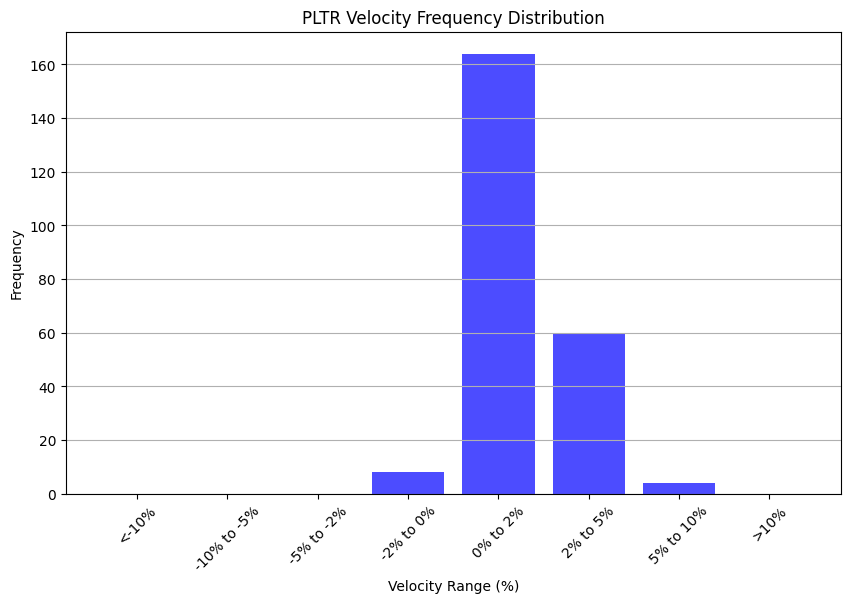

In [6]:


def analyze_pltr_velocity_frequency(start_date, end_date):
    # 下载 PLTR 的历史数据
    pltr = yf.Ticker("PLTR")
    data = pltr.history(start=start_date, end=end_date)

    # 计算波动率（Velocity）
    data['Velocity (%)'] = (data['High']-data['Low'])/data['Close'] * 100

    # 删除 NaN 值（首行会有 NaN）
    data = data.dropna()

    # 统计频率分布
    bins = [-10, -5, -2, 0, 2, 5, 10, 20]  # 定义区间
    labels = ['<-10%', '-10% to -5%', '-5% to -2%', '-2% to 0%', '0% to 2%', '2% to 5%', '5% to 10%', '>10%']
    data['Frequency'] = pd.cut(data['Velocity (%)'], bins=bins + [float('inf')], labels=labels, right=True)

    # 统计每个区间的频数
    frequency_table = data['Frequency'].value_counts(sort=False)
    frequency_df = frequency_table.reset_index()
    frequency_df.columns = ['Range', 'Frequency']

    # 输出均值和方差
    mean_velocity = data['Velocity (%)'].mean()
    variance_velocity = data['Velocity (%)'].var()
    print(f"Mean of Velocity (%): {mean_velocity:.2f}")
    print(f"Variance of Velocity (%): {variance_velocity:.2f}")

    # 打印频率分布表
    print("\nFrequency Distribution:")
    print(frequency_df)

    # 绘制频率分布直方图
    plt.figure(figsize=(10, 6))
    plt.bar(frequency_table.index.astype(str), frequency_table.values, color='blue', alpha=0.7)
    plt.title('PLTR Velocity Frequency Distribution')
    plt.xlabel('Velocity Range (%)')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.savefig("pltr_velocity_frequency.png")
    plt.show()

    # 保存频率分布表为 CSV
    frequency_df.to_csv("pltr_velocity_frequency.csv", index=False)

# 设置日期范围
start_date = "2024-01-01"
end_date = "2024-12-09"

# 调用函数
analyze_pltr_velocity_frequency(start_date, end_date)
